[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Gt9RZOtY9KF0_IfokOjeyyCEZtBS5XpQ)

# Echoregions Regions2D Plotting Demonstration

This notebook demonstrates some of the functionalities of `echoregions` to read Echoview region `.evr` files and visualize regions.

In [15]:
# install echoregions package (I should fix to the current version in the repo?)
!pip install -q git+https://github.com/OSOceanAcoustics/echoregions@45b8a80644468107f9d092e028c787e757b7dd85

In [16]:
# install echopype to read echousounder files
!pip install -q echopype==0.5.5

In [17]:
# install gdown to read data from Google Drive
!pip install gdown

In [18]:
import matplotlib.pyplot as plt
import xarray as xr
import os

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [20]:
import echoregions as er

In [21]:
# download an example file
!wget https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr -O x1.evr

--2022-05-10 19:14:52--  https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9349 (9.1K) [text/plain]
Saving to: ‘x1.evr’

x1.evr              100%[===================>]   9.13K  --.-KB/s    in 0s      

2022-05-10 19:14:53 (82.2 MB/s) - ‘x1.evr’ saved [9349/9349]



In [22]:
EVR_FILE = 'x1.evr'

### Get a Regions2D object with `read_evr`

In [23]:
r2d = er.read_evr(EVR_FILE)

## Plotting

In [24]:
# Display availible regions
print(r2d.data.region_id.values)

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35]
Length: 33, dtype: Int64


In [25]:
# let's select one id
id = 11

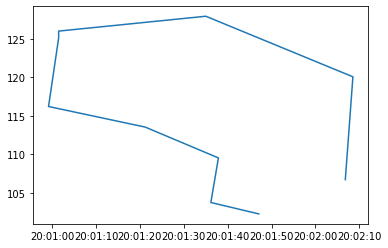

In [26]:
# Plot a region with a specific id with the `plot` function
r2d.plot(id)

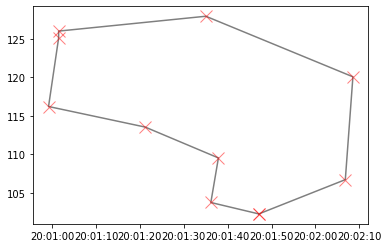

In [27]:
# Plot a closed region by using close_region=True.
# Optionally provide matplotlib kwargs for more customization.
r2d.plot(id, close_region=True, color='k', alpha=.5, marker='x', markeredgecolor='red', markersize=12)

## Plotting regions on an echogram

#### Reading Preprocessed Sonar Files

We have converted and calibrated a sample of echosounder files from the same transect and stored them in `.nc`. We can directly read them with the `xarray` library. 

In [28]:
# mounting the google drive (uncomment if you have permission to read directly from Google Drive)
# from google.colab import drive
# drive.mount('/content/drive/') 

In [29]:
# Paths for Google Drive read  (uncomment if you have permission to read directly from Google Drive)
# SONAR_PATH_Sv = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/Sv/'
# SONAR_PATH_raw = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/raw_converted/'

In [30]:
# install gdown to read data from Google Drive
!pip install gdown

In [31]:
# download a zipped sample folder from publicly available Google Drive
import gdown

url = 'https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S'
output = 'sample.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S
To: /content/sample.zip
100%|██████████| 1.67G/1.67G [00:23<00:00, 69.9MB/s]


'sample.zip'

In [32]:
# unzip into a sample folder
!unzip -o sample.zip

Archive:  sample.zip
   creating: sample/
   creating: sample/Sv/
   creating: sample/raw_converted/
  inflating: sample/Sv/Summer2017-D20170625-T124834_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T161209_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T134400_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T171948_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T193400_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T140924_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T190753_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T150430_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T223159_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T202452_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T234816_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T205018_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T220634_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T164600_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T181701_Sv.nc  

In [33]:
# Paths for local read
SONAR_PATH_Sv = './sample/Sv/'
SONAR_PATH_raw = './sample/raw_converted/'

`echoregions` has a function which selects only the echosounder files corresponding to certain regions from a bigger set of files.

In [34]:
# Select the file(s) that a region is contained in.
raw_files = os.listdir(SONAR_PATH_raw)
select_raw_files = r2d.select_sonar_file(raw_files, id)

In [35]:
# Select the file(s) that a region is contained in.
Sv_files = os.listdir(SONAR_PATH_Sv)
select_Sv_files = r2d.select_sonar_file(Sv_files, id)

In [36]:
# convert a single file output to a list of one element
if type(select_Sv_files) == str:
  select_Sv_files = [select_Sv_files]

In [37]:
# convert a single file output to a list of one element
if type(select_raw_files) == str:
  select_raw_files = [select_raw_files]

In [38]:
# reading the selected Sv files into one dataset
Sv = xr.open_mfdataset([os.path.join(SONAR_PATH_Sv, item) for item in select_Sv_files])

The `Sv` dataset has a `range_bin` dimension and in order to convert that to actual `depth` one needs to read the water level from the platform data.

In [39]:
## creating a depth dimension for Sv ##

# reading the processed platform data
ds_plat = xr.open_mfdataset([os.path.join(SONAR_PATH_raw, item) for item in select_raw_files], concat_dim='ping_time', group='Platform')
# assuming water level is constant
water_level = ds_plat.isel(location_time=0, frequency=0, ping_time=0).water_level
del ds_plat

range = Sv.range.isel(frequency=0, ping_time=0)

# assuming water levels are same for different frequencies and location_time
depth = water_level + range
depth = depth.drop_vars('frequency')
depth = depth.drop_vars('location_time')
# creating a new depth dimension
Sv['depth'] = depth
Sv = Sv.swap_dims({'range_bin': 'depth'})

#### Plotting

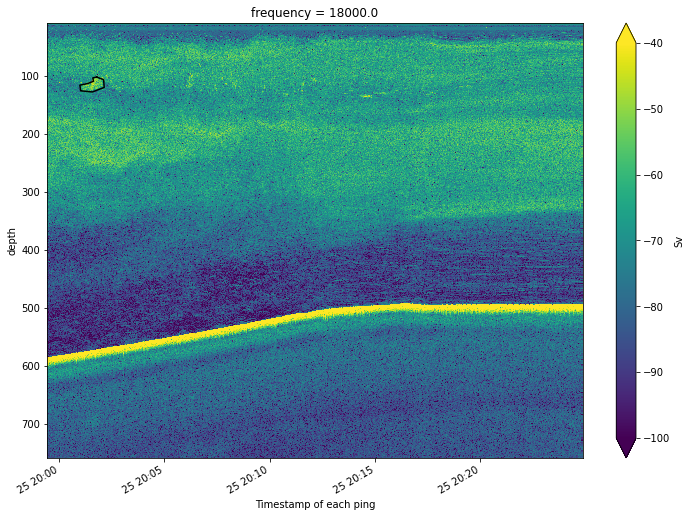

In [40]:
# plot Sv
Sv.Sv.sel(frequency=18000).plot(x='ping_time', vmax=-40, vmin=-100, yincrease=False, figsize=(12,8))
# plot region
r2d.plot(id, close_region=True, color='k')
plt.show()